# Prosper Loan Data Exploration
## by Omar Soliman

## Introduction
> This data set contains information on peer to peer loans facilitated by credit company Prosper


## Preliminary Wrangling


In [77]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [78]:
# load the data from csv file
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [79]:
# getting info about dataset metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [80]:
# get stastical summry for dataset
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [81]:
# investigate data with sample
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
103549,8C1335467849923126326FD,590233,2012-05-17 16:22:07.430000000,NaN,60,Current,NaN,0.27462,0.2489,0.2389,...,-190.25,0.0,0.0,0.0,0.0,1.0,0,0,0.0,27
90693,FB0D3594132773439123F46,977641,2013-11-04 10:46:23.837000000,NaN,36,Current,NaN,0.12691,0.0990,0.0890,...,-27.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
16341,0018336527159010012E040,32773,2006-08-20 16:24:33.837000000,C,36,Completed,2009-08-29 00:00:00,0.12700,0.1200,0.1150,...,-24.50,0.0,0.0,0.0,0.0,1.0,0,0,0.0,94
30783,18CE3396729465305B81FD2,190340,2007-08-20 21:01:12.220000000,B,36,Completed,2010-08-17 00:00:00,0.18726,0.1800,0.1700,...,-159.39,0.0,0.0,0.0,0.0,1.0,0,0,0.0,102
16251,13DA338294978458456E7AA,105188,2007-03-01 14:40:43.883000000,HR,36,Completed,2009-10-26 00:00:00,0.21857,0.2000,0.1900,...,-16.61,0.0,0.0,0.0,0.0,1.0,0,0,0.0,30
111430,2CF635895283540837D0313,888099,2013-09-05 12:27:13.560000000,NaN,60,Current,NaN,0.25718,0.2319,0.2219,...,-61.72,0.0,0.0,0.0,0.0,1.0,0,0,0.0,69
94919,C45A3580249475348BE1974,791450,2013-05-29 16:34:55.140000000,NaN,60,Current,NaN,0.25102,0.2259,0.2159,...,-71.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
80428,A63335764885912176ED400,760828,2013-04-25 04:02:29.357000000,NaN,60,Completed,2013-08-29 00:00:00,0.19364,0.1699,0.1599,...,-30.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,98
101774,617F3561670626824F2B4D7,666393,2012-11-07 16:46:46.053000000,NaN,60,Current,NaN,0.21822,0.1939,0.1839,...,-57.88,0.0,0.0,0.0,0.0,1.0,0,0,0.0,55
98272,2F483560108213367EF4106,658345,2012-10-22 08:22:47.190000000,NaN,60,Completed,2013-03-11 00:00:00,0.26528,0.2398,0.2298,...,-40.56,0.0,0.0,0.0,0.0,1.0,0,0,0.0,130


#### Note that this data set contains 81 columns and we are not gonna need all this column in our analysis so we will take the following columns

In [82]:
# Set list for the needed columns in our analysis
da_col =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [83]:
# Convert our list to data frame
df_da_col = df[da_col]

In [84]:
df_da_col.head(10)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,0,158
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20
5,60,Current,0.1314,B,1,Employed,0.0,8333.333333,NaN,15000,2013-12-24 00:00:00,0,1
6,36,Current,0.2712,E,1,Employed,0.0,2083.333333,NaN,3000,2013-04-18 00:00:00,0,1
7,36,Current,0.2019,C,2,Employed,0.0,3355.750000,NaN,10000,2013-05-13 00:00:00,0,1
8,36,Current,0.0629,AA,7,Employed,0.0,3333.333333,NaN,10000,2013-12-12 00:00:00,0,1
9,36,Current,0.0629,AA,7,Employed,0.0,3333.333333,NaN,10000,2013-12-12 00:00:00,0,1


## Data Cleaning
> As we can see "Prosper Rating" only from 2009, so we gonna drop the missing value in this colum since it will impact our dataset as this is a loan base rate and fixing dates and fill Nan value in "totalprosperloans" with 0 as it's related to the number for previos loans

In [85]:
# Remove NaN value from "ProsperRating (Alpha)" Column
df_da_col = df_da_col.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [86]:
#Convert "LoanOriginationDate" to datetime type
df_da_col['LoanOriginationDate'] = pd.to_datetime(df_da_col['LoanOriginationDate'])

In [87]:
# Convert NaN value in "TotalProsperLoans" to 0 to as it represnt 0 previous loans
df_da_col['TotalProsperLoans'] = df_da_col['TotalProsperLoans'].fillna(0)

In [88]:
df_da_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   TotalProsperLoans          84853 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Reco

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. /r
> i choosed some columns that will drive my analsysis and clean some
> if you need to check metadata for the dataset please check it [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)
> 

### What is/are the main feature(s) of interest in your dataset?

> Trying to figure out what features can be used to predict default on credit, Also i would like to check what are major factors connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the borrowers Prosper rating will have the highest impact on chances of default. Also I expect that loan amount will play a major role and maybe the category of credit. Prosper rating will depend on stated income and employment status.

## Univariate Exploration



#### Loan status

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

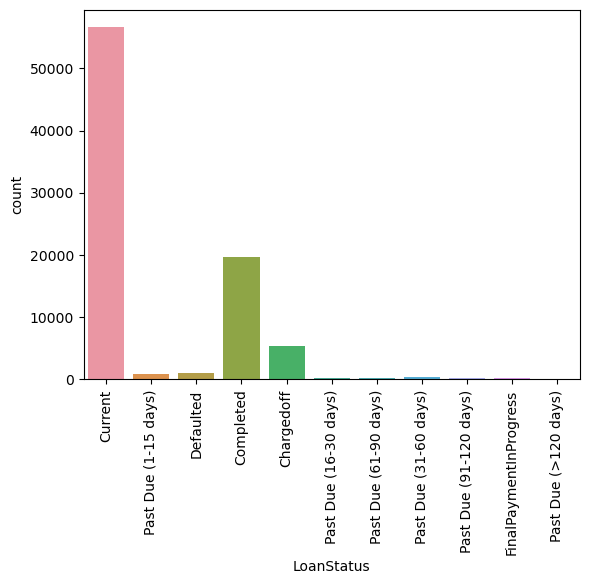

In [89]:
plt.xticks(rotation=90)
sb.countplot(data = df_da_col, x = 'LoanStatus')

 *Observation 1*

* Most of the loans in the data set are actually current loans.
* Past due loans are split in several groups based on the length of payment delay.
* Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount.

#### Employment Status

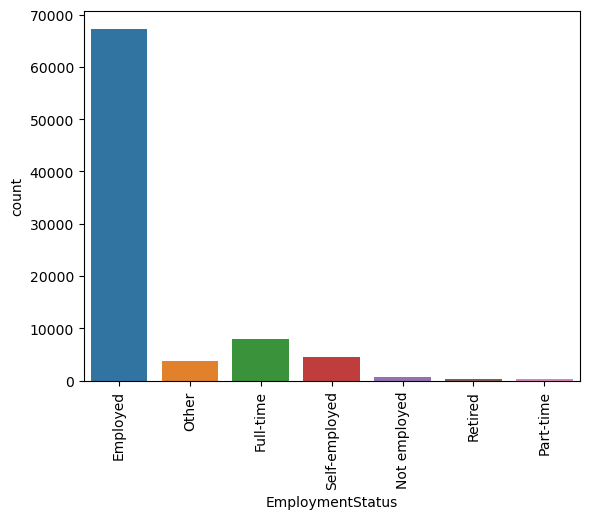

In [90]:
sb.countplot(data = df_da_col, x = 'EmploymentStatus');
plt.xticks(rotation = 90);

*Observation 2*
* most of borrowers are employed and all other categories as small part of borrowers.
* Group full time has highest, after that self empolyed are there and so on.

### Stated Monthly Income


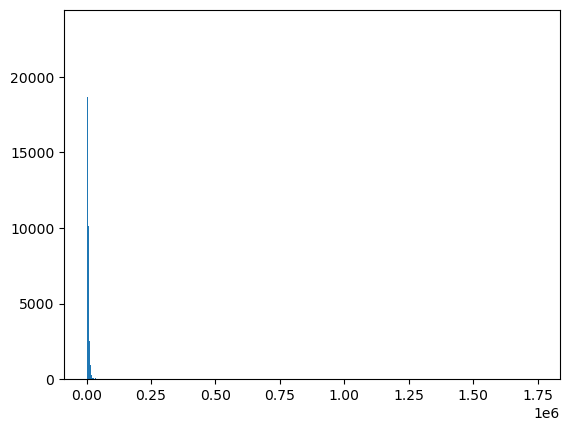

In [91]:
plt.hist(data=df_da_col, x='StatedMonthlyIncome', bins=1000);

we need to check how many outliers are there

In [92]:
income_std = df_da_col['StatedMonthlyIncome'].std()
income_mean = df_da_col['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(df_da_col[df_da_col['StatedMonthlyIncome'] >= boundary])

245

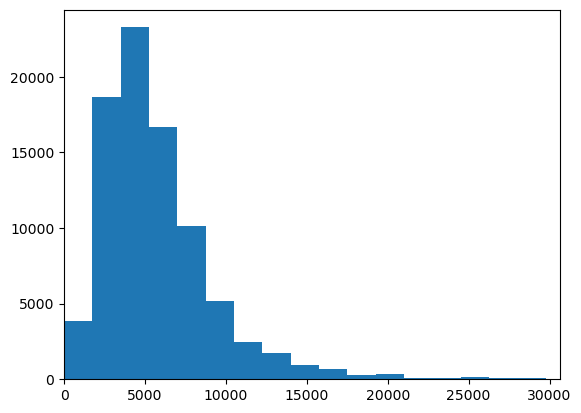

In [93]:
plt.hist(data=df_da_col, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);

*Observation 3*

* With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of monthly stated income is very awkward: with a lot of outliers and very large range but still it was right skew. The majority of borrowers are employed and all other categories as small part of borrowers and most of the loans in the data set are actually current loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans.

## Bivariate Exploration


In [94]:
# adjusting the form of data to categorize it easy
condition = (df_da_col['LoanStatus'] == 'Completed') | (df_da_col['LoanStatus'] == 'Defaulted') |\
                  (df_da_col['LoanStatus'] == 'Chargedoff')
df_da_col = df_da_col[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df_da_col['LoanStatus'] = df_da_col.apply(change_to_defaulted, axis=1)
df_da_col['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

In [95]:
# adjusting the form of data to categorize it easy
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df_da_col['ListingCategory (numeric)'] = df_da_col.apply(reduce_categorie, axis=1)
df_da_col['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

*Variable Listing Category is set up as numeric and most of the values have very low frequency, for the easier visualization so we have change it to categorical and reduce the number of categories*

### Status and Prosper Rating:


<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

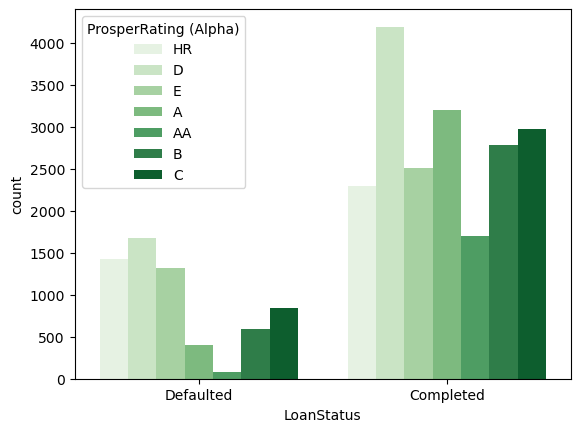

In [96]:
sb.countplot(data = df_da_col, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')

*Observation 1*

* The most frequent rating among defaulted loans is actually D.
* And the most frequent rating among Completed is alsoDand second highest is A and so on.

### Credit Start with Listing Category:


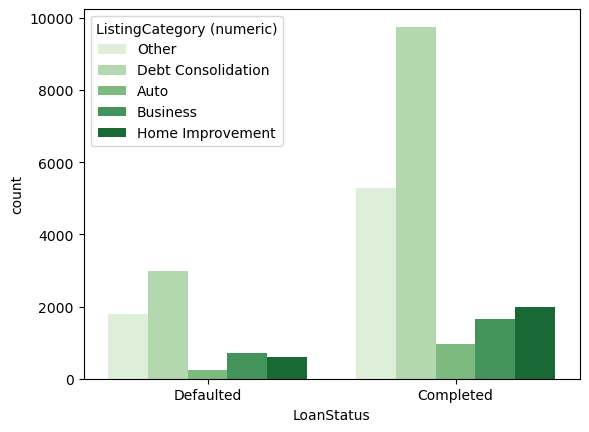

In [97]:
sb.countplot(data = df_da_col, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Greens');

*Observation 2*

* in both of the type the debt conslidation have most frequency of them

### Loan Status and Loan Amount


<AxesSubplot:xlabel='LoanStatus', ylabel='LoanOriginalAmount'>

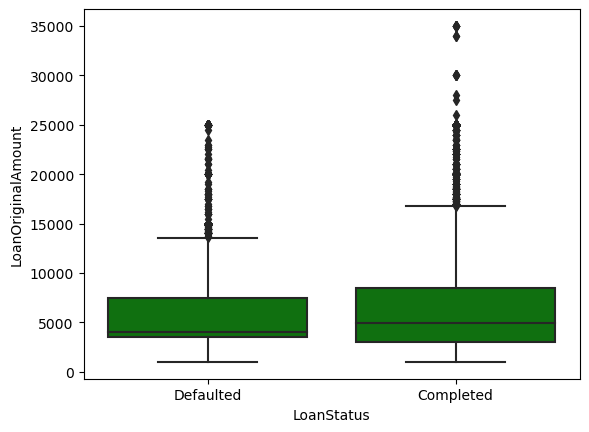

In [98]:
sb.boxplot(data = df_da_col, x = 'LoanStatus', y = 'LoanOriginalAmount', color = "Green")

### Investor in Loan Type

  *Observation 3*

  * as from above Graph we can see both types got near median
  * the defaulted credit are smaller than completed ones

### Prosper Rating and Employment Status

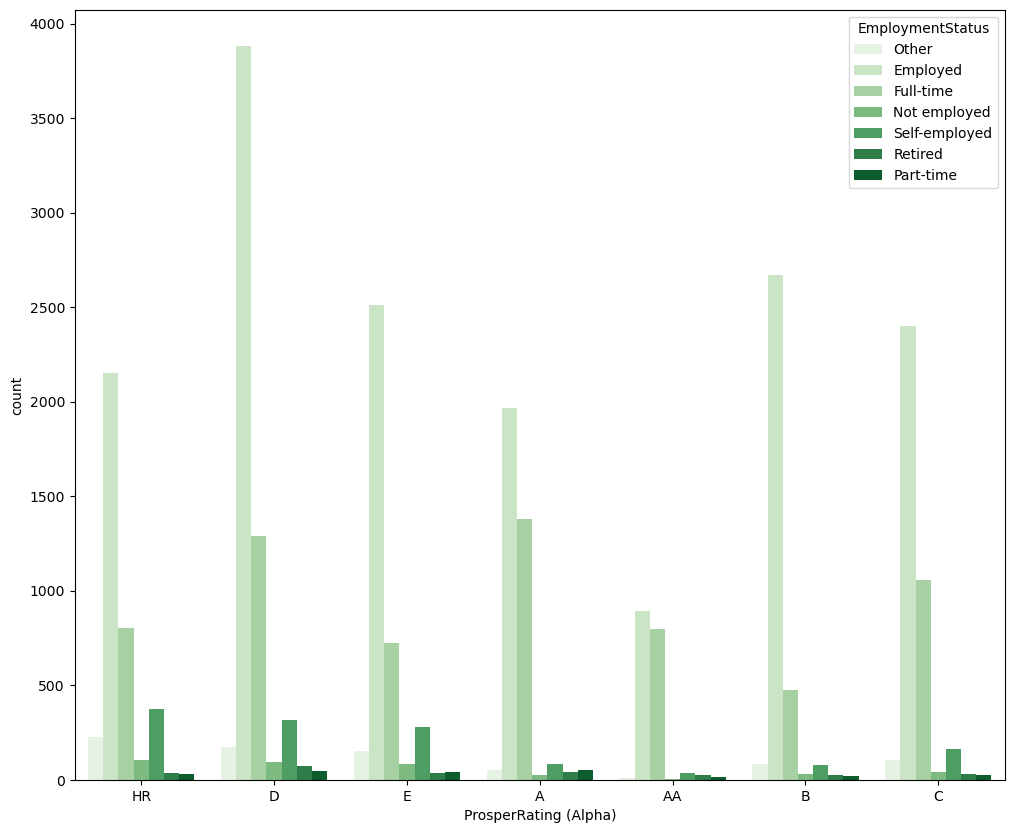

In [99]:

plt.figure(figsize = [12, 10])
sb.countplot(data = df_da_col, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Greens');

*Observation 4*

* Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In Loan status vs Loan amount defaulted credits tend to be smaller than completed credits onces. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Prosper rating D is the most frequent rating among defaulted credits.

## Multivariate Exploration


### Rating, Loan Amount and Loan Status


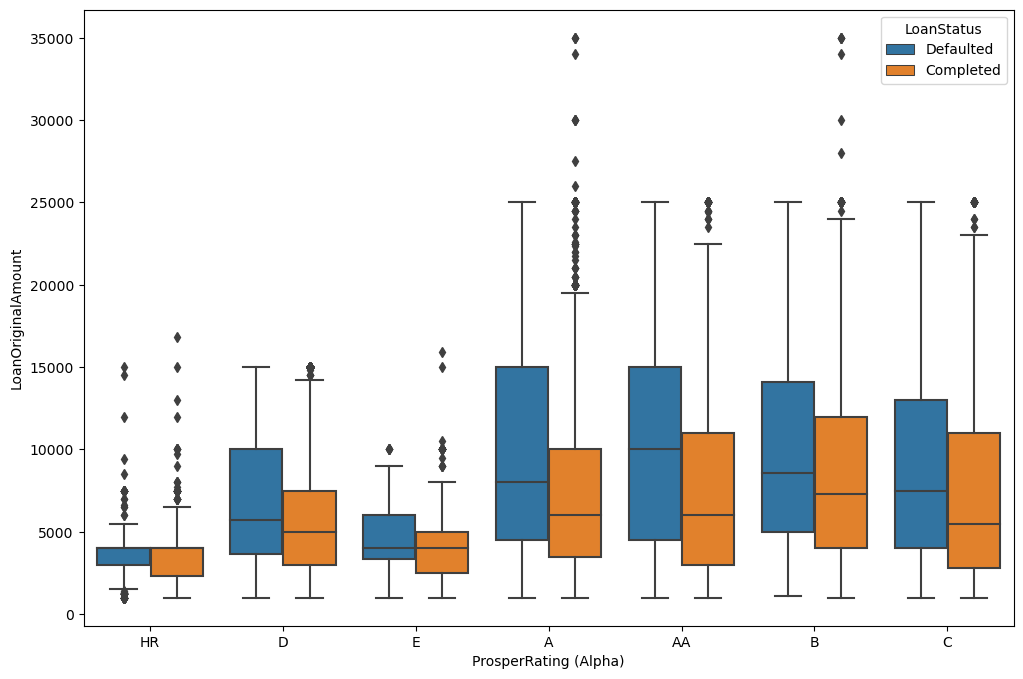

In [100]:
plt.figure(figsize = [12, 8])
sb.boxplot(data=df_da_col, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

*Observation 1*

* Except for the lowest ratings defaulted credits tend to be larger than completed.
* Most of the defaulted credits comes from individuals with low Prosper rating.

### Relationships between Credit category, Credit rating and outcome of Credit.


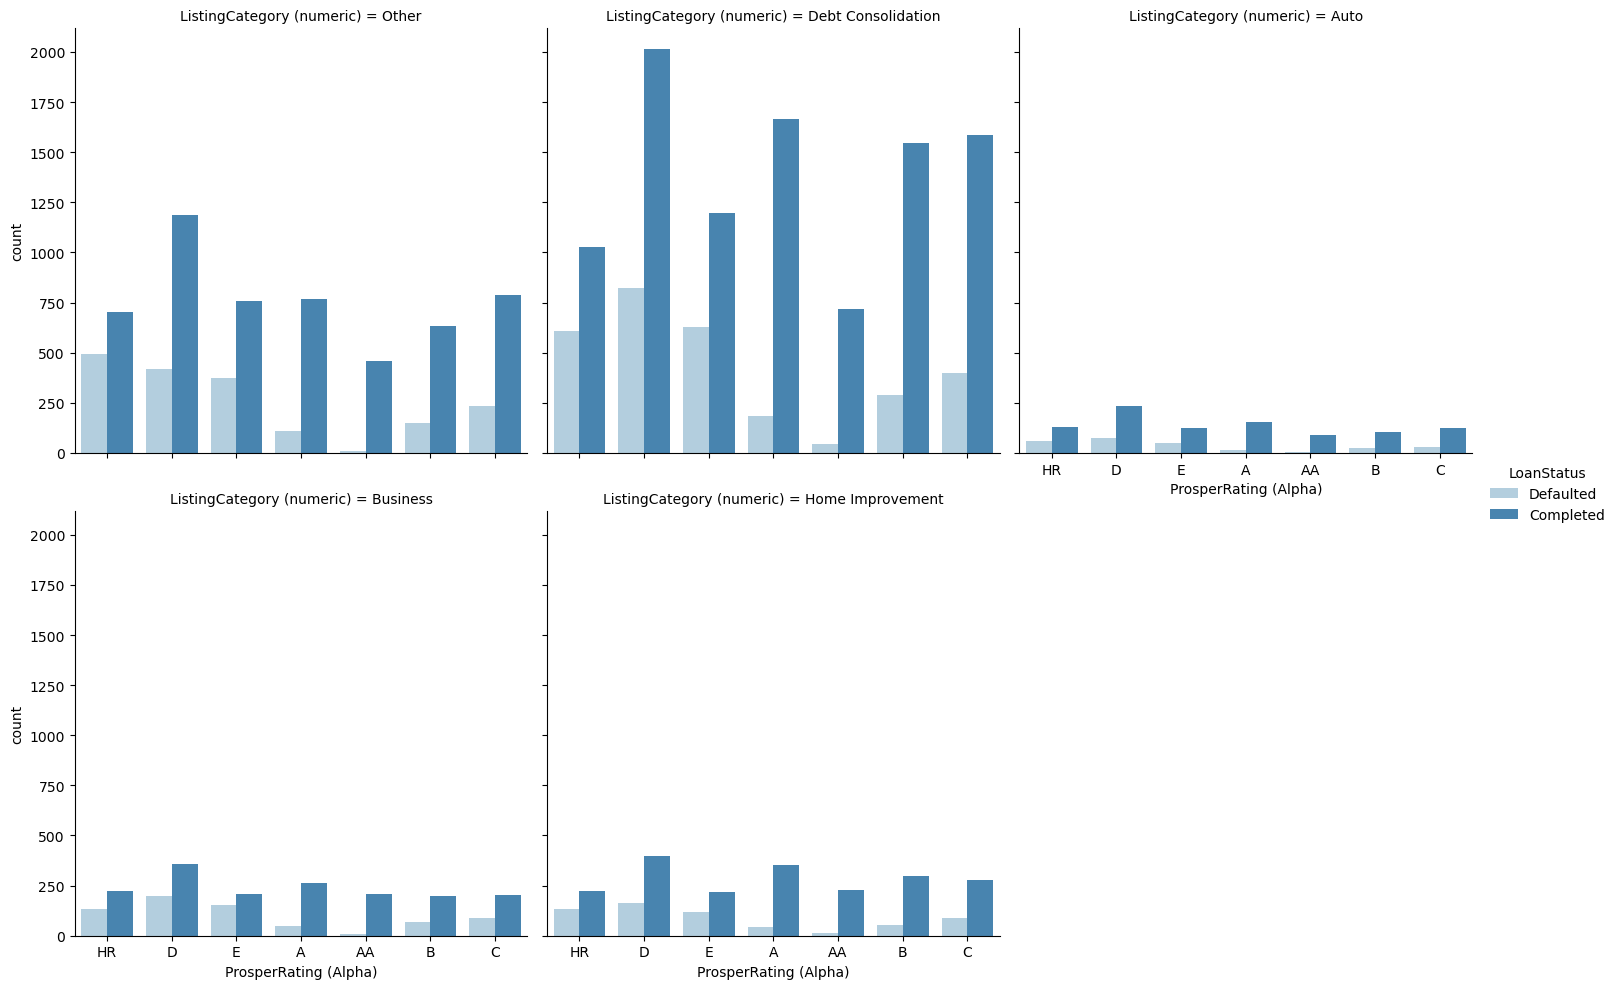

In [101]:
sb.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = df_da_col, kind = 'count', palette = 'Blues', col_wrap = 3);


*Observation 2*

* There are 5 graphs in the second one has much up and downs in it other than all of them.
* There is no substantial difference for default rates in different categories broken up by ratings.

### Amount, Listing Category Loan and Loan Status Interact


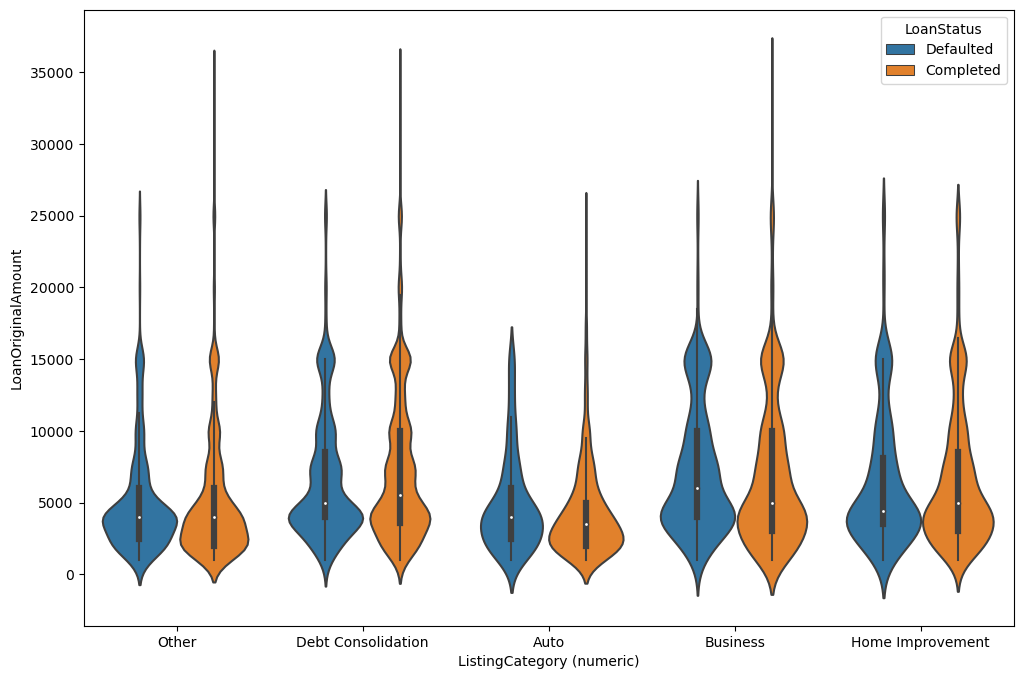

In [102]:
plt.figure(figsize = [12, 8])
sb.violinplot(data=df_da_col, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

*Observation 3*

* Except for Auto, Business and Home Improvemrnt dont have nearly equal mean amoong all of them.
* Business category tend to have larger amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Our initial assumptions were strengthened. Most of the defaulted credits comes from individuals with low Prosper rating and Business category tend to have larger amount.

### Were there any interesting or surprising interactions between features?

> Interesting find was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits.

## Conclusions
- Most of the loans in the data set are actually current loans. Past due loans are split in several groups based on the length of payment delay. Other big part is completed loans,    defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount.
- The majority of borrowers are employed and all other categories as small part of borrowers. In small Group full time has highest, after that self empolyed are there and so on.
- With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.
- The most frequent rating among defaulted loans is actually D. And the most frequent rating among Completed is alsoDand second highest is A and so on in Status and Prosper Rating.
- In both of them Credit Start with Listing Category Graphs of the debt Consolidation have most frequency among all of them.
- Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time.
- Except for the lowest ratings defaulted credits tend to be larger than completed. Most of the defaulted credits comes from individuals with low Prosper rating.
- Except for Auto, Business and Home Improvemrnt dont have nearly equal mean amoong all of them. Business category tend to have larger amount.

In [103]:
# Save clean copy for data
df_da_col.to_csv('CleanLoan.csv',index=False)